In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
import time

In [6]:
import cv2

In [7]:
import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 224
def get_data(data_dir):
    data = []
    for l in labels:
        path = os.path.join(data_dir, l)
        num_class = labels.index(l)
        for img in os.listdir(path):
            try:
                arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(arr, (img_size, img_size))
                data.append([resized_arr, num_class])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [10]:
train = get_data('train')
test = get_data('test')
val = get_data('val')

<Axes: xlabel='count'>

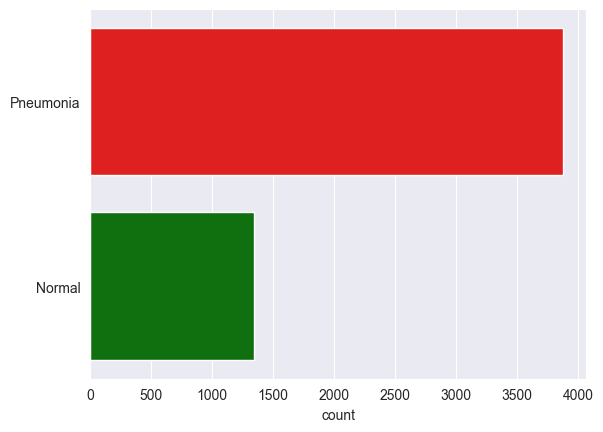

In [12]:
label = []
for i in train:
    if(i[1] == 0):
        label.append("Pneumonia")
    else:
        label.append("Normal")
sns.set_style('darkgrid')
sns.countplot(label, palette=['red', 'green'])

Text(0.5, 1.0, 'NORMAL')

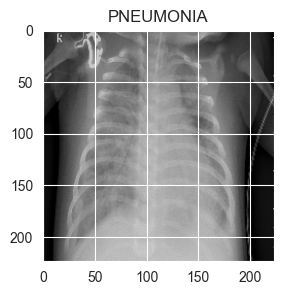

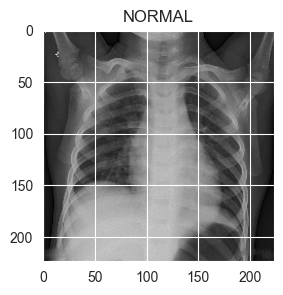

In [13]:
plt.figure(figsize = (3,3))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (3,3))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [14]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [15]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [16]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)